0.1
0.16000000000000003
0.1
0.16000000000000003
0.1
0.16000000000000003
0.1
0.16000000000000003
0.1
0.16000000000000003
0.1
0.16000000000000003
0.1
0.16000000000000003


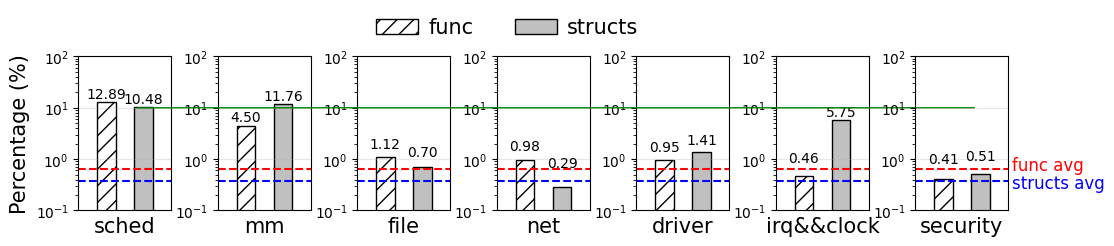

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
from matplotlib.patches import ConnectionPatch

def plot(type):
    """
        type = 1 or 0
            - type = 1, use `ax.text()` draw the number upon the bar
            - type = 0, don't draw the number upon the bar
    """
    # 创建图的样式设置
    label_font_conf = {
        # "weight": "bold",
        "size": "15"
    }
    bar_confs = {
        "color": ["white", "silver"],
        "linewidth": 1,
        "hatch": ["//", ""],
        "edgecolor": "black",
    }
    bar_width = 0.03

    # 创建标签
    ylabel = "Percentage (%)"
    xlabels = ['sched', 'mm', 'file', 'net', 'driver', 'irq&&clock', 'security']
    x = [0.1, 0.1+bar_width*2]

    # 创建数据
    values = np.array([
        [12.8866, 10.48387],
        [4.5045, 11.76471],
        [1.1215, 0.70126],
        [0.97826, 0.29155],
        [0.95238, 1.40625],
        [0.46399, 5.74713],
        [0.41068, 0.5102],
    ])

    # 创建1行7列的子图布局
    fig, axs = plt.subplots(1, 7, figsize=(12, 2), dpi=100)

    # 绘制柱状图
    hatches = ['//', '']
    axs[0].set_ylabel(ylabel, **label_font_conf)
    for i, ax in enumerate(axs):
        ax.set_xlabel(xlabels[i], **label_font_conf)
        ax.set_xticks([])
        bars = ax.bar(x, values[i], width=bar_width, **bar_confs)
        ax.set_xlim(min(x)-bar_width*1.5, max(x)+bar_width*1.5)
        # 为每个柱子设置不同的条纹样式
        for i, bar in enumerate(bars):
            bar.set_hatch(hatches[i])  
        # 在柱子上添加数据标签
        if type == 1:
            for j, bar in enumerate(ax.patches):
                height = bar.get_height()
                print(bar.get_x() + bar.get_width() / 2)
                ax.text(bar.get_x() + bar.get_width() / 2, height+0.3, f'{height:.2f}', ha='center', va='bottom')
        # 增加刻度线
        ax.grid(axis='y', alpha=0.3)
        # 设置y轴为对数比例尺
        ax.set_yscale('log')
        # 设置y轴刻度
        ax.set_yticks([100, 10, 1, 0.1])
        # 绘制平均线
        ax.axhline(y=0.65266, color='red', linestyle='--')
        ax.axhline(y=0.37161, color='blue', linestyle='--')

    # 设置图例
    bars = axs[0].containers[0].get_children()
    labels = ['func', 'structs']
    axs[0].legend(bars, labels, ncol=2, loc="lower left", bbox_to_anchor=(3, 1),frameon=False,fontsize=15,columnspacing = 2,handletextpad=0.5)

    con = ConnectionPatch(xyA=(0.15,10), xyB=(0.15,10), coordsA="data", coordsB="data", axesA=axs[0], axesB=axs[6], color="green")
    axs[6].add_artist(con)
    plt.text(0.21, 0.76, 'func avg', fontsize=12, color='red', va='center', ha='left')
    plt.text(0.21, 0.33, 'structs avg', fontsize=12, color='blue', va='center', ha='left')

    plt.subplots_adjust(wspace=0.5)
    plt.show()

if __name__ == '__main__':
    plot(1)